In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

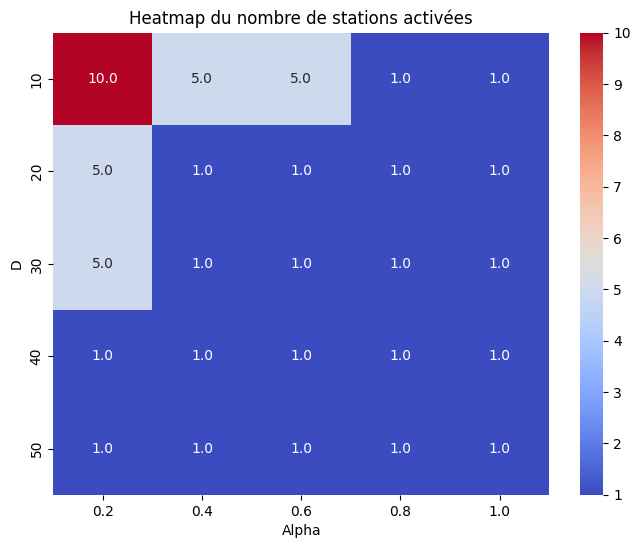

In [ ]:
# Charger les données CSV
df = pd.read_csv("results.csv")

# Conversion en format pivot (D en ligne, alpha en colonne, nb_stations en valeur)
df_pivot = df.pivot(index="D", columns="alpha", values="nb_stations")

# Dessiner la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot, annot=True, cmap="coolwarm", fmt=".1f")

# Ajouter les titres et labels
plt.title("Heatmap du nombre de stations activées")
plt.xlabel("Alpha")
plt.ylabel("D")

# Afficher la heatmap
plt.show()

In [15]:
from utils import create_nodes

nodes = create_nodes("../data/inputs_1km.csv")

In [54]:
# Display map
import geopandas as gpd

gdf_grid = gpd.read_file('../data/Filosofi2017_carreaux_1km_met.gpkg')
gdf_grid = gdf_grid.loc[gdf_grid["lcog_geo"] == "44055"].to_crs("EPSG:4326")
print(gdf_grid.columns)

Index(['Idcar_1km', 'I_est_1km', 'Ind', 'Men_1ind', 'Men_5ind', 'Men_prop',
       'Men_fmp', 'Ind_snv', 'Men_surf', 'Men_coll', 'Men_mais', 'Log_av45',
       'Log_45_70', 'Log_70_90', 'Log_ap90', 'Log_inc', 'Log_soc', 'Ind_0_3',
       'Ind_4_5', 'Ind_6_10', 'Ind_11_17', 'Ind_18_24', 'Ind_25_39',
       'Ind_40_54', 'Ind_55_64', 'Ind_65_79', 'Ind_80p', 'Ind_inc', 'Men_pauv',
       'Men', 'lcog_geo', 'geometry'],
      dtype='object')


In [67]:
import folium
from folium import features
import geopandas as gpd
from shapely.geometry import LineString
import branca.colormap as cm

center_lat, center_lon  = 47.28791353436721, -2.373752013244232
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)



colormap = cm.linear.YlOrRd_09.scale(gdf_grid['Ind_snv'].min(), gdf_grid['Ind_snv'].max())
colormap.caption = 'Ind_snv'

# Add the grid layer to the map with color based on 'Ind' column
folium.GeoJson(
    gdf_grid,
    name="Grid",
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['Ind_snv']),
        'color': 'blue',
        'weight': 1,
        'fillOpacity': 0.6,
    }
).add_to(m)

tooltip = folium.GeoJsonTooltip(
    fields=['Idcar_1km', 'Ind', 'Ind_snv'],
    aliases=['Name: ', 'Population: ', 'Médiane des revenus par unité de consommation: '],
    localize=True
)

# Add the GeoJson layer with tooltips
folium.GeoJson(
    gdf_grid,
    name="La Baule",
    style_function=lambda x: {"color": "black", "weight": 2, "fillOpacity": 0.1},
    tooltip=tooltip
).add_to(m)


# Add the color map to the map
colormap.add_to(m)

# Add a layer control
folium.LayerControl().add_to(m)


In [68]:
import ast

res = df.iloc[0]
print(res["D"], res["alpha"])
stations = ast.literal_eval(res["result"].replace(" ", ","))
stations = [int(x) for x in stations]


for i, n in enumerate(nodes):
    if stations[i] == 1:
        folium.Marker([n["latitude"], n["longitude"]], popup=f"Station {i}").add_to(m)

10 0.2


In [69]:
m